In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('deeplearning/dataset/pima-indians-diabetes.csv',\
                 names = [ "pregnant", "plasma", "pressure",\
                          "thickness", "insulin", "BMI",\
                          "pedigree", "age", "class"])

In [10]:
df.head()

pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(df.describe)

<bound method NDFrame.describe of      regnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0          6     148        72         35        0  33.6     0.627   50      1
1          1      85        66         29        0  26.6     0.351   31      0
2          8     183        64          0        0  23.3     0.672   32      1
3          1      89        66         23       94  28.1     0.167   21      0
4          0     137        40         35      168  43.1     2.288   33      1
..       ...     ...       ...        ...      ...   ...       ...  ...    ...
763       10     101        76         48      180  32.9     0.171   63      0
764        2     122        70         27        0  36.8     0.340   27      0
765        5     121        72         23      112  26.2     0.245   30      0
766        1     126        60          0        0  30.1     0.349   47      1
767        1      93        70         31        0  30.4     0.315   23      0

[768 rows x 9 col

In [12]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

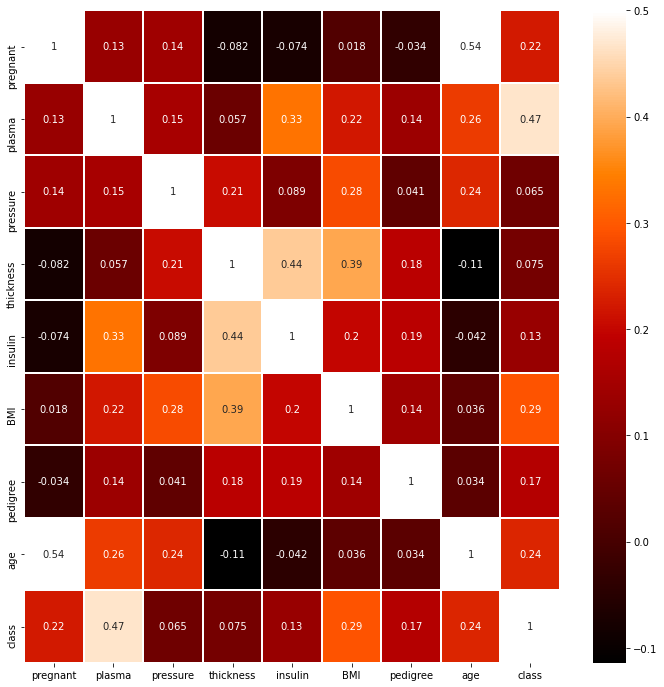

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidth=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

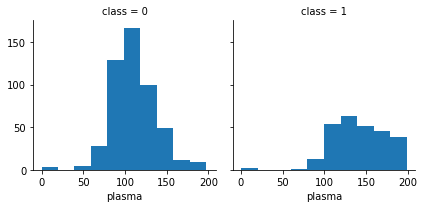

In [15]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)

#데이터 로드
dataset = np.loadtxt('deeplearning/dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # 108
model.add(Dense(8, activation='relu'))  # 104
model.add(Dense(1, activation='sigmoid')) # 9

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10) # 배치단위 평균

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1])) # 샘플단위 평균

Epoch 1/200
77/77 [==============================] - 0s 740us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 727us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 779us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 753us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 779us/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 766us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 792us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 805us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 779us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 701us/step - loss: 0.6656 - accur

77/77 [==============================] - 0s 623us/step - loss: 0.5121 - accuracy: 0.7422
Epoch 82/200
77/77 [==============================] - 0s 610us/step - loss: 0.5087 - accuracy: 0.7461
Epoch 83/200
77/77 [==============================] - 0s 610us/step - loss: 0.5171 - accuracy: 0.7344
Epoch 84/200
77/77 [==============================] - 0s 597us/step - loss: 0.5120 - accuracy: 0.7305
Epoch 85/200
77/77 [==============================] - 0s 571us/step - loss: 0.5088 - accuracy: 0.7461
Epoch 86/200
77/77 [==============================] - 0s 610us/step - loss: 0.5046 - accuracy: 0.7513
Epoch 87/200
77/77 [==============================] - 0s 584us/step - loss: 0.5061 - accuracy: 0.7500
Epoch 88/200
77/77 [==============================] - 0s 623us/step - loss: 0.5073 - accuracy: 0.7500
Epoch 89/200
77/77 [==============================] - 0s 740us/step - loss: 0.5080 - accuracy: 0.7474
Epoch 90/200
77/77 [==============================] - 0s 701us/step - loss: 0.5111 - accuracy: 

77/77 [==============================] - 0s 753us/step - loss: 0.4852 - accuracy: 0.7513
Epoch 161/200
77/77 [==============================] - 0s 675us/step - loss: 0.4800 - accuracy: 0.7630
Epoch 162/200
77/77 [==============================] - 0s 623us/step - loss: 0.4807 - accuracy: 0.7565
Epoch 163/200
77/77 [==============================] - 0s 597us/step - loss: 0.4775 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 636us/step - loss: 0.4781 - accuracy: 0.7643
Epoch 165/200
77/77 [==============================] - 0s 597us/step - loss: 0.4844 - accuracy: 0.7526
Epoch 166/200
77/77 [==============================] - 0s 597us/step - loss: 0.4726 - accuracy: 0.7734
Epoch 167/200
77/77 [==============================] - 0s 571us/step - loss: 0.4676 - accuracy: 0.7695
Epoch 168/200
77/77 [==============================] - 0s 636us/step - loss: 0.4768 - accuracy: 0.7643
Epoch 169/200
77/77 [==============================] - 0s 584us/step - loss: 0.4706 - a